**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:
C_train = pd.read_csv("https://raw.githubusercontent.com/yutongquan/STATS201_Problem_Set_2/main/Data/processed_data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/yutongquan/STATS201_Problem_Set_2/main/Data/processed_data/Classification_Test.csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

Positive                  0
Daily Return_Past_ma10    2
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,Positive,Daily Return_Past_ma10
2,1,-0.001895
3,1,0.000984
4,1,0.002206
5,0,0.001717
6,0,-0.003158


In [7]:
C_test.isna().sum()

Positive                  0
Daily Return_Past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:
R_train = pd.read_csv("https://raw.githubusercontent.com/yutongquan/STATS201_Problem_Set_2/main/Data/processed_data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/yutongquan/STATS201_Problem_Set_2/main/Data/processed_data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

Daily Return              1
Daily Return_Past_ma10    2
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

Daily Return              0
Daily Return_Past_ma10    0
dtype: int64

In [12]:
R_train.head()

,Daily Return,Daily Return_Past_ma10
2,0.003862,-0.001895
3,0.004649,0.000984
4,0.000251,0.002206
5,-0.022657,0.001717
6,-0.027464,-0.003158


In [13]:
R_test.head()

,Daily Return,Daily Return_Past_ma10
667,-0.000312,-0.028359
668,-0.025906,-0.028292
669,-0.089876,-0.014539
670,0.069209,-0.024535
671,-0.006578,-0.015326


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [14]:
C_train.head()

,Positive,Daily Return_Past_ma10
2,1,-0.001895
3,1,0.000984
4,1,0.002206
5,0,0.001717
6,0,-0.003158


In [15]:
X_train = pd.DataFrame(np.array(C_train['Daily Return_Past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Positive'].astype(int))

In [16]:
C_test.head()

,Positive,Daily Return_Past_ma10
667,0,-0.028359
668,0,-0.028292
669,0,-0.014539
670,1,-0.024535
671,0,-0.015326


In [17]:
X_test = pd.DataFrame(np.array(C_test['Daily Return_Past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Positive'].astype(int))

## Import base packages

In [18]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [21]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,

## Evaluations

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.43      0.48       192
           1       0.38      0.48      0.43       141

    accuracy                           0.45       333
   macro avg       0.46      0.46      0.45       333
weighted avg       0.47      0.45      0.46       333



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


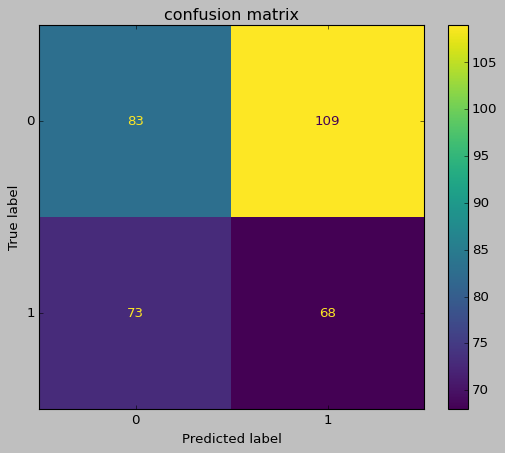

In [23]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


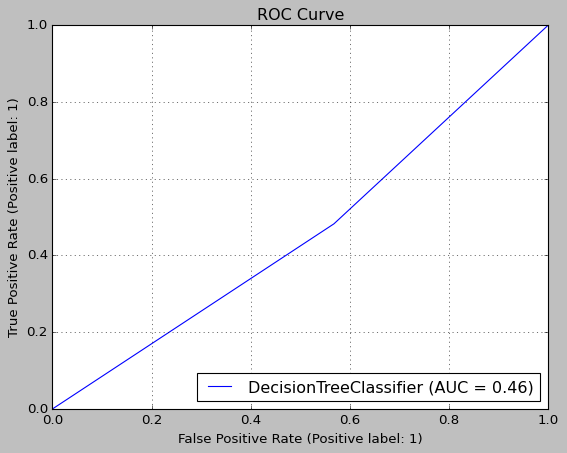

In [24]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-26-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [27]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.43      0.48       192
           1       0.38      0.48      0.43       141

    accuracy                           0.45       333
   macro avg       0.46      0.46      0.45       333
weighted avg       0.47      0.45      0.46       333



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


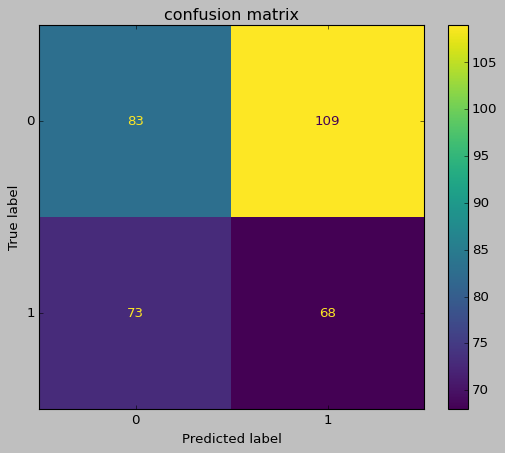

In [28]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


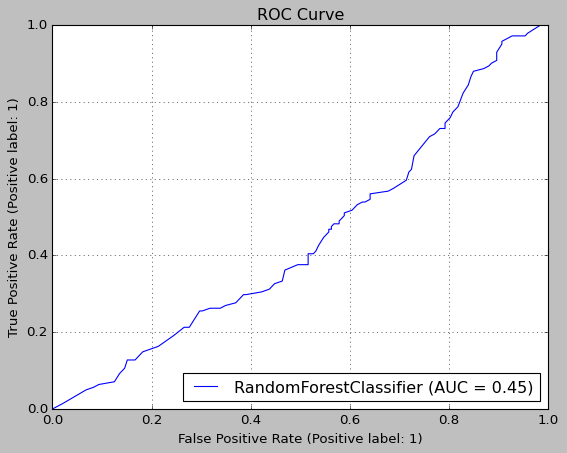

In [29]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.42      1.00      0.59       141

    accuracy                           0.42       333
   macro avg       0.21      0.50      0.30       333
weighted avg       0.18      0.42      0.25       333



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


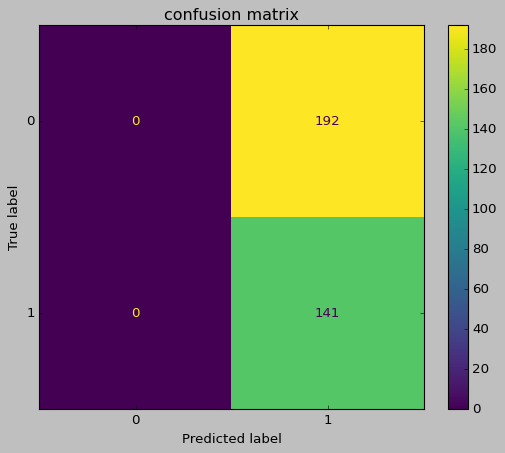

In [33]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


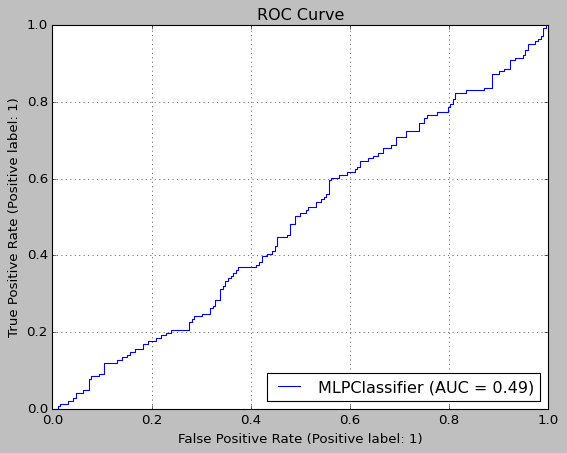

In [34]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Ridge Classifier

In [35]:
from sklearn.linear_model import RidgeClassifier

In [36]:
mdl = RidgeClassifier().fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print(classification_report(y_test, mdl.predict(X_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       192
           1       0.42      1.00      0.59       141

    accuracy                           0.42       333
   macro avg       0.21      0.50      0.30       333
weighted avg       0.18      0.42      0.25       333



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


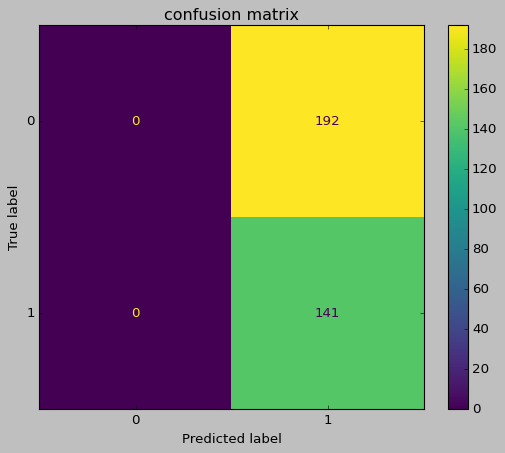

In [38]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


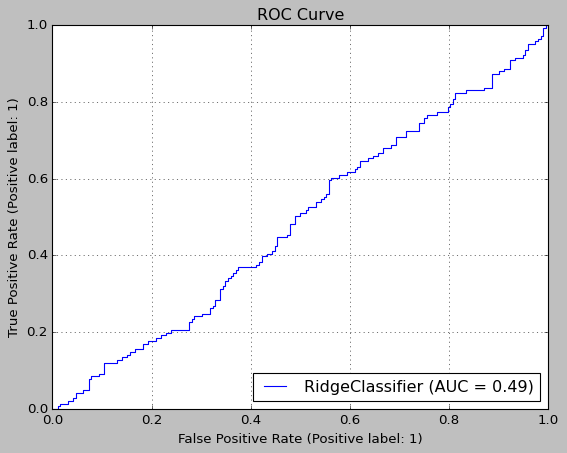

In [39]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [40]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 35.1 MB/s 
     |████████████████████████████████| 279 kB 75.9 MB/s 
     |████████████████████████████████| 62 kB 811 kB/s 
     |████████████████████████████████| 101 kB 13.8 MB/s 
     |████████████████████████████████| 49 kB 6.5 MB/s 
     |████████████████████████████████| 224 kB 82.2 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 802 kB 67.3 MB/s 
     |████████████████████████████████| 132 kB 82.0 MB/s 
     |████████████████████████████████| 1.0 MB 73.5 MB/s 
     |████████████████████████████████| 41 kB 484 kB/s 
     |████████████████████████████████| 60.2 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 60.6 MB/s 
     |████████████████████████████████| 280 kB 84.7 MB/s 
     |████████████████████████████████| 74 kB 3.8 MB/s 
     |████████████████████████████████| 4

In [41]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [42]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [43]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [44]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    665
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12332.09 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based

In [45]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [46]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.516517,0.516517,0.445055,0.574468,0.501548,0.586466,0.029910,0.004442,0.281832,0.029910,0.004442,0.281832,1,True,11
1,NeuralNetTorch,0.507508,0.507508,0.441624,0.617021,0.514793,0.556391,0.019674,0.013065,3.463197,0.019674,0.013065,3.463197,1,True,12
2,LightGBMLarge,0.489489,0.489489,0.427136,0.602837,0.500000,0.541353,0.016086,0.003495,0.452622,0.016086,0.003495,0.452622,1,True,13
3,LightGBM,0.477477,0.477477,0.413613,0.560284,0.475904,0.593985,0.004488,0.024048,0.918580,0.004488,0.024048,0.918580,1,True,4
4,NeuralNetFastAI,0.477477,0.477477,0.431535,0.737589,0.544503,0.586466,0.021286,0.016379,6.341069,0.021286,0.016379,6.341069,1,True,10
5,KNeighborsUnif,0.465465,0.465465,0.398907,0.517730,0.450617,0.518797,0.004395,0.004950,0.714655,0.004395,0.004950,0.714655,1,True,1
6,KNeighborsDist,0.459459,0.459459,0.387283,0.475177,0.426752,0.488722,0.003524,0.003394,0.643877,0.003524,0.003394,0.643877,1,True,2
7,CatBoost,0.453453,0.453453,0.395939,0.553191,0.461538,0.563910,0.005877,0.004072,2.345268,0.005877,0.004072,2.345268,1,True,7
8,ExtraTreesEntr,0.453453,0.453453,0.380117,0.460993,0.416667,0.518797,0.139651,0.092602,1.882387,0.139651,0.092602,1.882387,1,True,9
9,ExtraTreesGini,0.453453,0.453453,0.385475,0.489362,0.431250,0.511278,0.139828,0.061478,1.627422,0.139828,0.061478,1.627422,1,True,8


# Machine Learning Regression

## important global packages

In [47]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [48]:
R_train.head()

,Daily Return,Daily Return_Past_ma10
2,0.003862,-0.001895
3,0.004649,0.000984
4,0.000251,0.002206
5,-0.022657,0.001717
6,-0.027464,-0.003158


In [49]:
X_train = pd.DataFrame(R_train['Daily Return_Past_ma10'])
y_train = pd.DataFrame(R_train['Daily Return'])

In [50]:
R_test.head()

,Daily Return,Daily Return_Past_ma10
667,-0.000312,-0.028359
668,-0.025906,-0.028292
669,-0.089876,-0.014539
670,0.069209,-0.024535
671,-0.006578,-0.015326


In [51]:
X_test = pd.DataFrame(R_test['Daily Return_Past_ma10'])
y_test = pd.DataFrame(R_test['Daily Return'])

## Linear Regression

In [52]:
from sklearn import linear_model

In [53]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [54]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.008588104091244997


In [55]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.000862
1,0.000864
2,0.001305
3,0.000984
4,0.001280
...,...
328,0.003592
329,0.003981
330,0.004241
331,0.004002


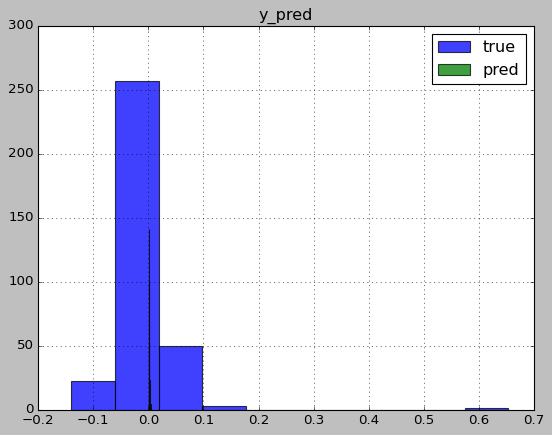

In [56]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-58-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [59]:
# calculate R2
from sklearn.metrics import r2_score

In [60]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.3190206882378195


In [61]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.025027
1,0.025027
2,-0.023226
3,-0.043088
4,0.017015
...,...
328,0.019467
329,0.019467
330,0.019467
331,0.019467


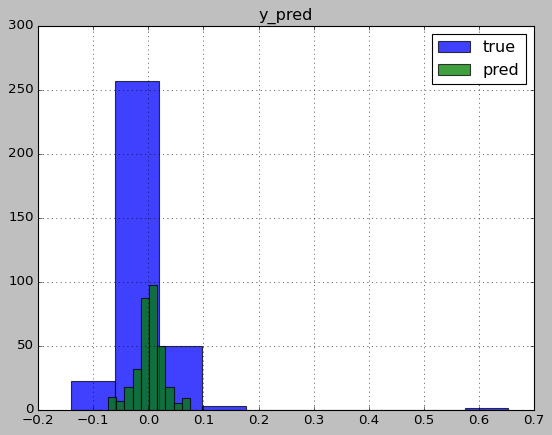

In [62]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Ridge Regression

In [63]:
from sklearn import linear_model

In [64]:
mdl = linear_model.Ridge(alpha=.5).fit(X_train, y_train)

In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: -0.00888205758549887


In [66]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.001679
1,0.001680
2,0.001751
3,0.001699
4,0.001747
...,...
328,0.002118
329,0.002180
330,0.002222
331,0.002184


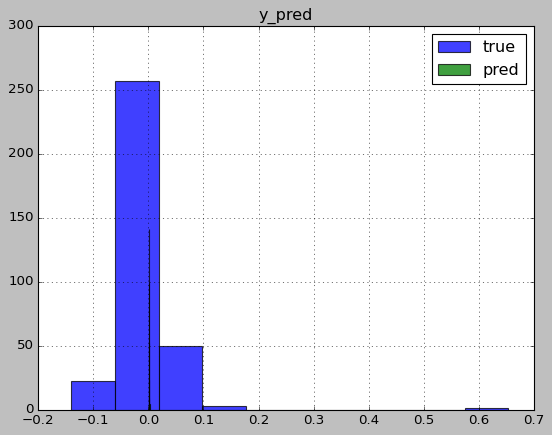

In [67]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

## Auto-ML

In [68]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [69]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [70]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    665
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.1817514778269262, -0.1634329109709633, 0.00184, 0.0385)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12540.28 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)

In [71]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [72]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,-0.051038,-0.051038,-0.002605,-0.027272,-0.015379,-0.006662,-0.040887,0.008329,0.001626,0.242822,0.008329,0.001626,0.242822,1,True,11
1,LightGBMXT,-0.051086,-0.051086,-0.002610,-0.027269,-0.015093,-0.008564,-0.040870,0.001938,0.001664,0.147771,0.001938,0.001664,0.147771,1,True,3
2,LightGBM,-0.051118,-0.051118,-0.002613,-0.027412,-0.015977,-0.009832,-0.040829,0.001663,0.001890,0.167238,0.001663,0.001890,0.167238,1,True,4
3,CatBoost,-0.051133,-0.051133,-0.002615,-0.027258,-0.015678,-0.010408,-0.040838,0.002898,0.001368,0.166904,0.002898,0.001368,0.166904,1,True,6
4,WeightedEnsemble_L2,-0.051424,-0.051424,-0.002644,-0.027735,-0.016192,-0.021941,-0.040683,0.039806,0.020734,1.684229,0.003077,0.000388,0.342182,2,True,12
5,NeuralNetTorch,-0.051494,-0.051494,-0.002652,-0.027525,-0.016249,-0.024712,-0.040744,0.008444,0.004211,0.723662,0.008444,0.004211,0.723662,1,True,10
6,NeuralNetFastAI,-0.051537,-0.051537,-0.002656,-0.028009,-0.016623,-0.026452,-0.040792,0.015837,0.008867,0.486233,0.015837,0.008867,0.486233,1,True,8
7,KNeighborsUnif,-0.052598,-0.052598,-0.002767,-0.031635,-0.023350,-0.069154,-0.042961,0.007442,0.024787,0.006186,0.007442,0.024787,0.006186,1,True,1
8,XGBoost,-0.053014,-0.053014,-0.002810,-0.031435,-0.022963,-0.086118,-0.042190,0.009315,0.003625,0.125553,0.009315,0.003625,0.125553,1,True,9
9,ExtraTreesMSE,-0.055140,-0.055140,-0.003040,-0.034155,-0.024055,-0.174969,-0.044561,0.073825,0.070812,0.469787,0.073825,0.070812,0.469787,1,True,7


In [73]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -0.021940853265160598


In [74]:
y_pred = predictor.predict(X_test)
y_pred

667   -0.002219
668   -0.001880
669   -0.001526
670   -0.006043
671    0.001954
         ...   
995   -0.013947
996   -0.018956
997   -0.022153
998   -0.019214
999   -0.019283
Name: target, Length: 333, dtype: float32

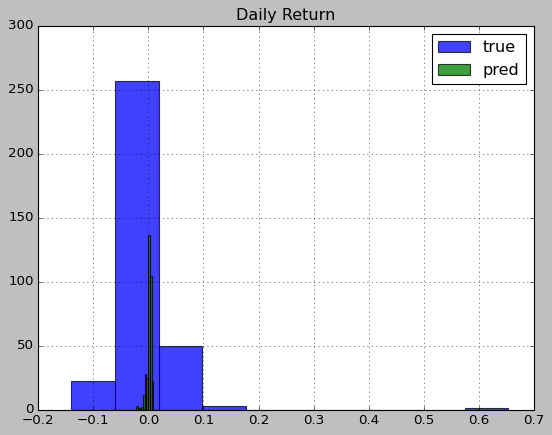

In [75]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
